In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import pickle as pkl
import ipywidgets as widgets
from mpl_toolkits import mplot3d
from scipy import sparse
import sys

In [2]:
!ls data/stringer

6845348.zip
allimgs.mat
dbstims.mat
default_stim_order.mat
images_natimg2800_4D_M170714_MP032_2017-09-22.mat
images_natimg2800_4D_M170717_MP033_2017-09-19.mat
images_natimg2800_4D_M170717_MP033_2017-09-22.mat
images_natimg2800_4D_M170717_MP034_2017-09-20.mat
images_natimg2800_8D_M161025_MP030_2017-06-07.mat
images_natimg2800_8D_M170604_MP031_2017-07-02.mat
images_natimg2800_8D_M170714_MP032_2017-08-10.mat
images_natimg2800_8D_M170714_MP032_2017-09-15.mat
images_natimg2800_8D_M170717_MP033_2017-08-22.mat
images_natimg2800_8D_M170717_MP034_2017-09-15.mat
images_natimg2800_all.mat
images_natimg2800_small_M170714_MP032_2017-09-18.mat
images_natimg2800_small_M170717_MP033_2017-08-23.mat
images_natimg2800_small_M170717_MP034_2017-09-17.mat
images_natimg2800_white_all.mat
images_ori_all.mat
images_sparse_all.mat
instructions.pdf
natimg2800_4D_M170714_MP032_2017-09-22.mat
natimg2800_4D_M170717_MP033_2017-09-19.mat
natimg2800_4D_M170717_MP033_2017-09-22.mat
natimg2800_4D_M170717_MP034_2017-09-2

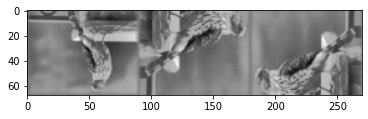

In [3]:
import scipy.io as sio
mt = sio.loadmat('data/stringer/natimg2800_M170717_MP034_2017-09-11.mat')

### stimulus responses
resp = mt['stim'][0]['resp'][0]    # stimuli by neurons
istim = mt['stim'][0]['istim'][0]   # identities of stimuli in resp
spont = mt['stim'][0]['spont'][0]  # timepoints by neurons

### cell information
med = mt['med']                 # cell centers (X Y Z)
mt['stat'][0]     # first cell’s stats
mt['stat'][0]['npix']       # one example field, tells you how pixels make up the cell

### loading images
mt2 = sio.loadmat('data/stringer/images_natimg2800_all.mat')
imgs = mt2['imgs']  # 68 by 270 by number of images
# check out first image using matplotlib.pyplot
plt.imshow(imgs[:,:,0], cmap='gray')

In [4]:
mt['stat'].shape

(10103, 1)

In [5]:
resp.shape, istim.shape

((5880, 10103), (5880, 1))

In [6]:
mt_small = sio.loadmat('data/stringer/natimg2800_small_M170717_MP034_2017-09-17.mat')
images_small = sio.loadmat('data/stringer/images_natimg2800_small_M170717_MP034_2017-09-17.mat')['imgs']
istim_small = mt_small['stim'][0]['istim'][0]


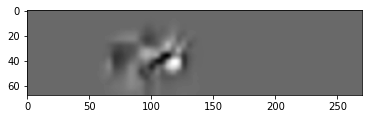

In [7]:
plt.imshow(images_small[:, :, 0], cmap='gray')

In [8]:
images_in_order = images_small[:, :, (istim_small[:, 0] - 1) % 2800]
images_in_order.shape

(68, 270, 5880)

In [9]:
istim_small.min()

1

In [10]:
matrices = np.dot(images_in_order[:, :, ::11], resp[::11, :])
matrices.shape

(68, 270, 10103)

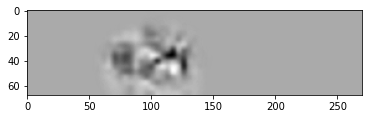

In [14]:
plt.imshow(matrices.sum(axis=2), cmap='gray')